In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline  

## Apriori probability distribution

Starting with a Gaussian the posterior distribution with a linear function is also a Gaussian

In [2]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2*np.pi*sig*sig)) * np.exp(-np.power(x - mu, 2.) / (2 * sig*sig))

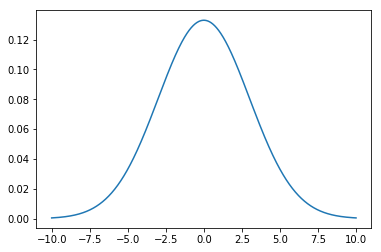

In [3]:
x_apriori = np.linspace(-10, 10, 1000)
p_apriori = gaussian(x_apriori, 0, 3)

plt.plot(x_apriori, p_apriori)

## Posterior distribution

In [4]:
def post_distribution(x_apriori, p_apriori, f):
    x_post = []   # posterior x
    p_post = []   # posterior probability

    for pos in range(len(x_apriori)):
        fx = f(x_apriori[pos])
        x_post.append(fx)
        
        # area under posterior delta x must be the same like under the apriori delta x
        if (pos > 0):
            dx_a = x_apriori[pos] - x_apriori[pos - 1]
            dx_p = x_post[pos] - x_post[pos - 1]
            p_p = p_apriori[pos] * np.abs(dx_a / dx_p)
            p_post.append(p_p)
        else:
            p_post.append(p_apriori[pos])
            
    return x_post, p_post
    

## Examples

### Linear functions

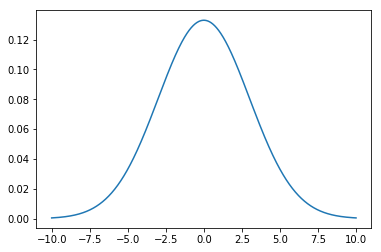

In [5]:
# identity function
f = lambda x: x
x, p = post_distribution(x_apriori, p_apriori, f)

plt.plot(x, p)

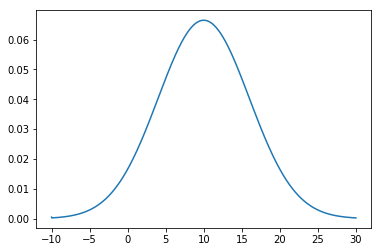

In [6]:
# linear function
f = lambda x: 2 * x + 10
x, p = post_distribution(x_apriori, p_apriori, f)

plt.plot(x, p)

### Non-linear functions

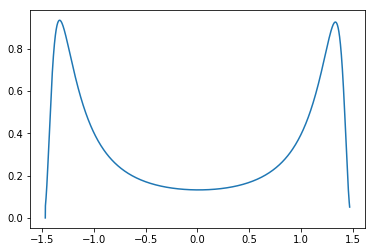

In [7]:
# arctan
f = np.arctan
x, p = post_distribution(x_apriori, p_apriori, f)

plt.plot(x, p)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


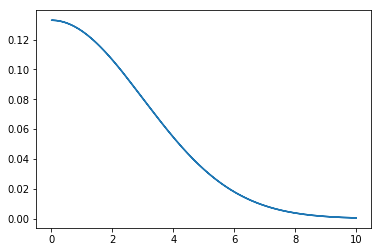

In [10]:
# |x|
f = np.abs
x, p = post_distribution(x_apriori, p_apriori, f)

plt.plot(x, p)

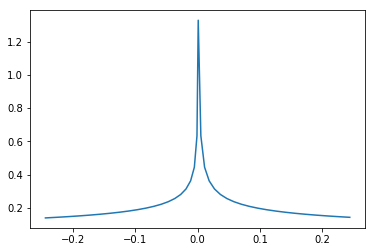

In [8]:
# x * sqrt(|x|)
f = lambda x: x * np.sqrt(np.abs(x))
x, p = post_distribution(x_apriori, p_apriori, f)

m = int(len(x) / 2)
delta = 20

plt.plot(x[m-delta:m+delta], p[m-delta:m+delta])

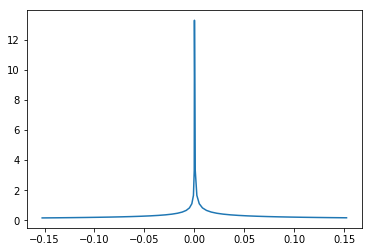

In [9]:
# x * |x|
f = lambda x: x * np.abs(x)
x, p = post_distribution(x_apriori, p_apriori, f)

m = int(len(x) / 2)
delta = 20

plt.plot(x[m-delta:m+delta], p[m-delta:m+delta])